In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
# set to be lower priority
os.nice(1) 

1

In [3]:
import pandas  as pd
from cdcp.paths import DATA_DIR, ensure_dir
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pathlib2 import Path
from tqdm.autonotebook import tqdm
pd.set_option('display.max_columns', 500)
from joblib import Parallel, delayed

/mnt/cube/tsainbur/conda_envs/cdcp_paper_cube/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import sys


In [4]:
from datetime import datetime

In [5]:
from cdcp.spiketrain_analysis.unit_statistics import get_unit_spike_trains

In [6]:
from cdcp.spiketrain_analysis.unit_stats.unit_shape_and_stats import (
    compute_unit_shape
)

In [7]:
# "2021-10-07_16-05-58_796914" '2021-10-06_13-30-08_899062' '2021-10-01_17-02-56_744915' 
statistics_timestamp = '2021-10-23_23-02-31_846685'# datetime.now().strftime("%Y-%m-%d_%H-%M-%S_%f")#
statistics_timestamp

'2021-10-23_23-02-31_846685'

In [8]:
birds = [
    ('B1597', '2021-05-14_12-40-20_423998', 'kilosort2_5'),
    ('B1188', '2021-05-31_18-52-29_558216', 'kilosort2_5'),
    ('B1595', '2021-07-10_16-42-47_090257', 'kilosort2'),
    ('B1276', '2021-07-14_11-14-02_257025', 'kilosort2'),
    ('B1426', '2021-07-14_11-29-39_657273', 'kilosort2'),
    ('B1432', '2021-06-01_15-14-38_561892', 'kilosort2_5'),
    ('B1170', '2021-06-01_21-01-26_519005', 'kilosort2_5'),
    ('B1244', '2021-07-14_12-57-45_546674', 'kilosort2'),
    ('B1593', '2021-06-28_18-13-24_826008', 'kilosort2_5'),
    ('B1248', '2021-07-03_18-08-01_063431', 'kilosort2_5'),
    # acute
    ('B1279', '2021-04-12_16-27-07_289527', 'kilosort2_5'),
    ('B1500', '2021-08-27_09-24-48_680961', 'kilosort2_5'),
    ('B1239', '2021-05-17_22-18-51_557635', 'kilosort2'),
    ('B1459', '2021-08-26_21-21-12_755614', 'kilosort2_5'),
]

In [9]:
acute_birds = ['B1279', 'B1500', 'B1239', 'B1459']

In [10]:
min_playbacks = 1000

### Compute spike vectors and statistics

In [11]:
identifier = "spike_shape"

In [12]:
def get_unit_statistic(
    unit_to_analyze,
    spikesorting_folder,
    statistics_timestamp,
    unit_features,
    identifier=identifier,
    recompute=False,
    parallel=True,
    save=True,
    plot=False,
):
    def run():

        unit_series_save_loc = (
            spikesorting_folder
            / "unit_statistics"
            / statistics_timestamp
            / identifier
            / "{}.pickle".format(unit_to_analyze.cluster_id)
        )

        # check if we need to run everything
        if unit_series_save_loc.exists() and (recompute is False):
            print("neurometric already exists")
            return

        # make sure folder exists
        ensure_dir(unit_series_save_loc)

        unit_series_list = []
        # load spike trains

        # how self-similar the unit's activity remains over time
        statistic_series = compute_unit_shape(
            unit_to_analyze.cluster_id, unit_features, unit_to_analyze
        )
        if statistic_series is not None:
            unit_series_list.append(statistic_series)

        # skip if no data is available
        if len(unit_series_list) == 0:
            return

        # save final row
        unit_series = pd.concat(unit_series_list)

        if save:
            unit_series.to_pickle(unit_series_save_loc)

        return unit_series

    if parallel == False:
        run()
    else:
        try:
            run()
        except Exception as e:
            with open("error_log.txt", "w") as text_file:
                text_file.write(str(e))
            raise ValueError(unit_to_analyze.cluster_id)

  0%|          | 0/14 [00:00<?, ?it/s]

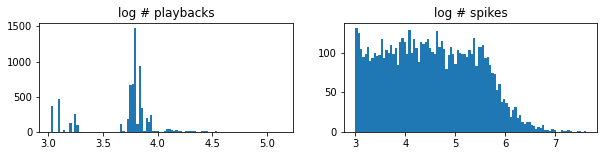

B1597 total # merged units: 6750


unit:   0%|          | 0/6750 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s
/mnt/cube/tsainbur/Projects/github_repos/cdcp_chronic/cdcp/spiketrain_analysis/unit_stats/unit_shape_and_stats.py:65: RuntimeWarning: Mean of empty slice
  "full_width": np.nanmean(spike_full_widths)

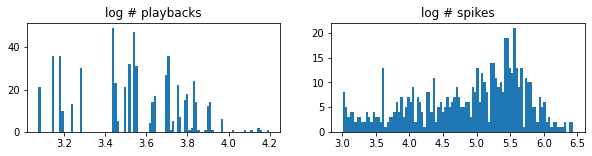

B1188 total # merged units: 603


unit:   0%|          | 0/603 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 603 out of 603 | elapsed:    2.5s finished


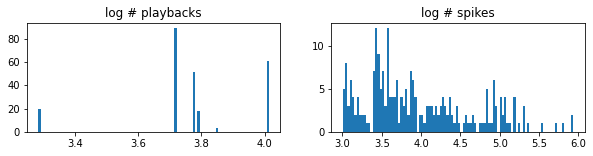

B1595 total # merged units: 242


unit:   0%|          | 0/242 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
/mnt/cube/tsainbur/Projects/github_repos/cdcp_chronic/cdcp/spiketrain_analysis/unit_stats/unit_shape_and_stats.py:65: RuntimeWarning: Mean of empty slice
  "full_width": np.nanmean(spike_full_widths)

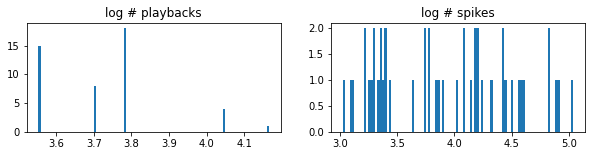

B1276 total # merged units: 46


unit:   0%|          | 0/46 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.2s finished


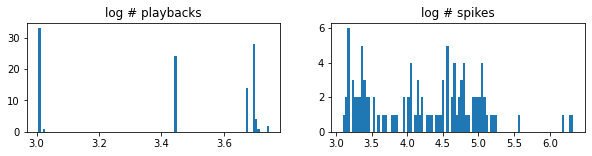

B1426 total # merged units: 107


unit:   0%|          | 0/107 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
/mnt/cube/tsainbur/Projects/github_repos/cdcp_chronic/cdcp/spiketrain_analysis/unit_stats/unit_shape_and_stats.py:65: RuntimeWarning: Mean of empty slice
  "full_width": np.nanmean(spike_full_widths)

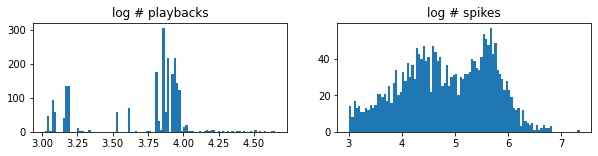

B1432 total # merged units: 2198


unit:   0%|          | 0/2198 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
/mnt/cube/tsainbur/Projects/github_repos/cdcp_chronic/cdcp/spiketrain_analysis/unit_stats/unit_shape_and_stats.py:65: RuntimeWarning: Mean of empty slice
  "full_width": np.nanmean(spike_full_widths)

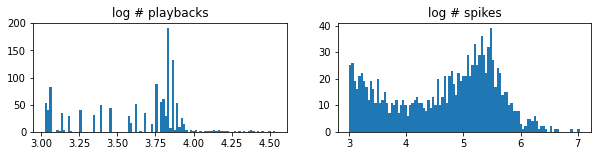

B1170 total # merged units: 1281


unit:   0%|          | 0/1281 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1281 out of 1281 | elapsed:    5.5s finished


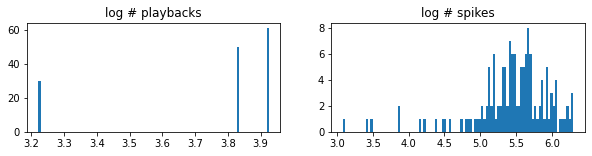

B1244 total # merged units: 141


unit:   0%|          | 0/141 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 141 out of 141 | elapsed:    0.6s finished


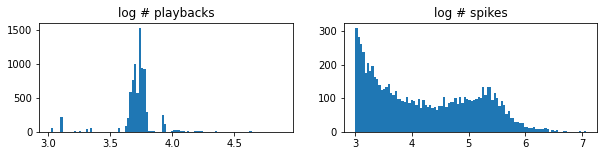

B1593 total # merged units: 7966


unit:   0%|          | 0/7966 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.7s remaining:    0.0s
/mnt/cube/tsainbur/Projects/github_repos/cdcp_chronic/cdcp/spiketrain_analysis/unit_stats/unit_shape_and_stats.py:65: RuntimeWarning: Mean of empty slice
  "full_width": np.nanmean(spike_full_widths)

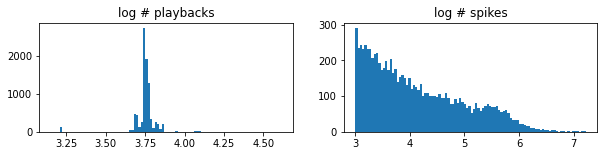

B1248 total # merged units: 8698


unit:   0%|          | 0/8698 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.4s remaining:    0.0s
/mnt/cube/tsainbur/Projects/github_repos/cdcp_chronic/cdcp/spiketrain_analysis/unit_stats/unit_shape_and_stats.py:65: RuntimeWarning: Mean of empty slice
  "full_width": np.nanmean(spike_full_widths)

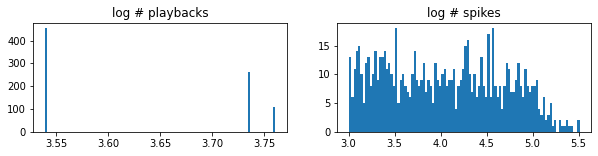

B1279 total # merged units: 827


unit:   0%|          | 0/827 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 827 out of 827 | elapsed:    3.3s finished


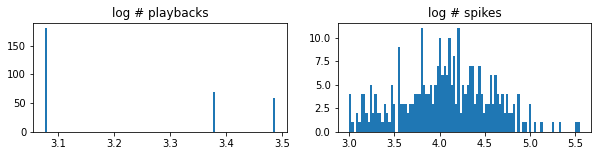

B1500 total # merged units: 307


unit:   0%|          | 0/307 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 307 out of 307 | elapsed:    1.2s finished


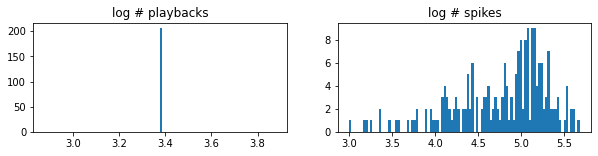

B1239 total # merged units: 206


unit:   0%|          | 0/206 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 206 out of 206 | elapsed:    0.8s finished


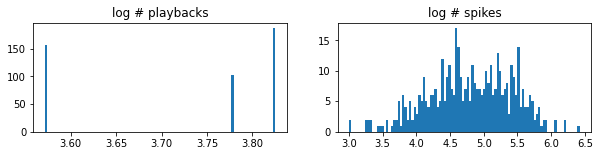

B1459 total # merged units: 447


unit:   0%|          | 0/447 [00:00<?, ?it/s]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
/mnt/cube/tsainbur/Projects/github_repos/cdcp_chronic/cdcp/spiketrain_analysis/unit_stats/unit_shape_and_stats.py:65: RuntimeWarning: Mean of empty slice
  "full_width": np.nanmean(spike_full_widths)

In [13]:
for bird, timestamp, sorter in tqdm(birds):
    spikesorting_folder = (DATA_DIR
                / "spikesorting"
                / bird
                / timestamp)
    #if bird != 'B1593':
    #    continue
    recording_summary_df = pd.read_pickle(spikesorting_folder/ 'recording_df.pickle')

    # get units that are to be merged
    merged_units = pd.read_pickle(spikesorting_folder / 'unit_clusters2.pickle')
    merged_units = merged_units.sort_values(by='n_playbacks', ascending=False)
    merged_units = merged_units[merged_units.n_playbacks.astype('float')  > min_playbacks]
    merged_units = merged_units[merged_units.n_spikes > 1000]
    
    # get all units info
    if bird in acute_birds:
        unit_features = pd.read_pickle(spikesorting_folder / 'recording_features.pickle')
    else:
        unit_features = pd.read_pickle(spikesorting_folder / 'recording_features_merged_units2.pickle')
    
    plot = True
    if plot:
        fig, axs = plt.subplots(ncols=2, figsize=(10,2))
        axs[0].hist(np.log10(merged_units.n_playbacks.values.astype('float')+1), bins = 100);
        axs[0].set_title('log # playbacks')
        axs[1].hist(np.log10(merged_units.n_spikes.values.astype('float')+1), bins = 100);
        axs[1].set_title('log # spikes')
        plt.show()
        print('{} total # merged units: {}'.format(bird, len(merged_units)))

    ensure_dir(spikesorting_folder / 'unit_statistics' / statistics_timestamp)
    Parallel(n_jobs = 1, verbose=10)(
        delayed(get_unit_statistic)(
            unit_to_analyze,
            spikesorting_folder,
            statistics_timestamp,
            recompute=True,
            parallel=True,
            unit_features = unit_features,
            
                    )
        for uniti, unit_to_analyze in tqdm(
            merged_units.iterrows(), desc="unit", total=len(merged_units)
        )
    );

In [14]:
unit_features[:3]

,template,presence_ratio,isi_violations_rate,max_channel,center_of_mass_x,center_of_mass_y,spike_amplitude,amp_channel_0,amp_channel_1,amp_channel_2,amp_channel_3,amp_channel_4,amp_channel_5,amp_channel_6,amp_channel_7,amp_channel_8,amp_channel_9,amp_channel_10,amp_channel_11,amp_channel_12,amp_channel_13,amp_channel_14,amp_channel_15,amp_channel_16,amp_channel_17,amp_channel_18,amp_channel_19,amp_channel_20,amp_channel_21,amp_channel_22,amp_channel_23,amp_channel_24,amp_channel_25,amp_channel_26,amp_channel_27,amp_channel_28,amp_channel_29,amp_channel_30,amp_channel_31,amp_channel_32,amp_channel_33,amp_channel_34,amp_channel_35,amp_channel_36,amp_channel_37,amp_channel_38,amp_channel_39,amp_channel_40,amp_channel_41,amp_channel_42,amp_channel_43,amp_channel_44,amp_channel_45,amp_channel_46,amp_channel_47,amp_channel_48,amp_channel_49,amp_channel_50,amp_channel_51,amp_channel_52,amp_channel_53,amp_channel_54,amp_channel_55,amp_channel_56,amp_channel_57,amp_channel_58,amp_channel_59,amp_channel_60,amp_channel_61,amp_channel_62,amp_channel_63,snrs,amplitude_cutoff,best_channel_0,best_channel_1,best_channel_2,best_channel_3,best_channel_4,best_channel_5,best_channel_6,best_channel_7,best_channel_8,best_channel_9,isi_violations_count,n_spikes,recording_id,datetime,unit,n_hours,spike_rate,good_unit,z_score_template,median_relative_channel_max
0,"[[38.0, 2.0, 3.0, 9.0, 0.0, 5.0, 7.0, 1.0, 1.0...",1.0,0.016098,0,200.761180,29.686013,-1008.5,1008.5,8.0,4.0,-0.0,1.5,-0.0,-2.0,3.0,0.5,1.0,2.0,1.5,1.0,1.0,-0.0,1.0,1.0,-0.0,1.0,3.0,-0.0,1.0,-0.0,1.0,2.0,-1.0,-1.0,-0.0,2.5,2.0,2.0,3.0,-0.0,-0.0,-0.0,-0.0,4.0,-0.0,-0.0,-0.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,-0.0,7.0,0.5,-0.0,1.0,-0.0,-0.0,8.0,-0.0,-0.0,-0.0,1.0,2.0,-0.0,-0.0,-0.0,20.585960,0.007981,0,55,1,49,2,36,7,19,31,28,324,26705,exp1_rec1_dat2021-07-20_17-15-11,2021-07-20 17:15:11,0,5.590597,1.326881,True,"[[1.3555804202471096, 0.00013726999496187895, ...",0.002478
1,"[[22.0, 0.0, 1.0, 11.0, 0.0, 4.0, 6.0, 3.0, 1....",1.0,0.348502,0,285.714286,44.897959,-410.0,410.0,4.0,-0.0,5.0,1.0,3.0,-0.0,2.0,-0.0,2.0,1.0,1.0,-0.0,1.0,-0.0,2.0,1.0,-0.0,1.0,2.0,-0.0,1.0,-0.0,2.0,2.0,-1.0,-0.0,3.0,3.0,2.0,-0.0,2.0,-0.0,-0.0,-0.0,-0.0,3.0,-0.0,-0.0,-0.0,2.0,-0.0,-0.0,2.0,1.0,1.0,2.0,1.0,1.0,4.0,-0.0,-0.0,1.0,1.0,-0.0,4.0,-0.0,-0.0,-0.0,-0.0,1.5,-0.0,-0.0,-0.0,8.369106,0.000173,0,3,1,49,55,5,36,28,27,24,7014,140445,exp1_rec1_dat2021-07-20_17-15-11,2021-07-20 17:15:11,1,5.590597,6.978235,True,"[[1.898381351254745, -0.20597308487571586, -0....",0.006907
2,"[[21.0, 1.0, 6.0, 7.0, 1.0, 4.0, 8.0, 0.0, 0.0...",1.0,0.477637,0,610.135970,51.915946,-375.0,375.0,2.0,1.0,2.0,2.0,-0.0,-0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,-0.0,1.0,-0.0,1.0,2.0,1.0,-1.0,1.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,-0.0,-0.0,-0.0,2.0,-0.0,1.0,1.0,2.0,1.0,2.0,1.0,-0.0,7.0,1.0,-0.0,-0.0,1.5,-0.0,6.0,-0.0,1.0,1.0,-0.0,2.5,1.0,1.0,-0.0,7.654670,0.000173,0,49,55,28,36,60,24,40,15,44,9613,335442,exp1_rec1_dat2021-07-20_17-15-11,2021-07-20 17:15:11,2,5.590597,16.666975,True,"[[1.6272217504225346, -0.05925896717912066, 0....",0.006098


### Debugging

In [15]:
breakme

NameError: name 'breakme' is not defined

In [ ]:
np.where(merged_units.cluster_id == 12315)

In [ ]:
Parallel(n_jobs=1, verbose=10)(
    delayed(get_unit_statistic)(
        unit_to_analyze,
        spikesorting_folder,
        statistics_timestamp,
            unit_features = unit_features,
        recompute=True,
        parallel=False,
        save=False,
        plot=False,
    )
    for uniti, unit_to_analyze in tqdm(
        merged_units[10:]
        .iterrows(), desc="unit", total=len(merged_units)
    )

)

In [ ]:
unit_features[:3]

In [ ]:
unit_features = pd.read_pickle(spikesorting_folder / 'recording_features.pickle')

In [ ]:
unit_features[unit_features.recording_id== 'exp1_rec1_dat2021-09-04_22-16-45_1550']

In [ ]:
%debug

### make dataframe

In [16]:
ensure_dir(DATA_DIR / 'unit_statistics' / statistics_timestamp / identifier)

In [17]:
def read_and_unit(i):
    try:
        df = pd.read_pickle(i)
        df['unit'] = i.stem
        return df
    except:
        return

In [18]:
for bird, timestamp, sorter in tqdm(birds):
    print(bird)
    spikesorting_folder = DATA_DIR / "spikesorting" / bird / timestamp
    recording_summary_df = pd.read_pickle(spikesorting_folder / "recording_df.pickle")

    unit_series_save_loc = (
        spikesorting_folder / "unit_statistics" / statistics_timestamp / identifier
    )
    unit_pickles = list(unit_series_save_loc.glob("*.pickle"))
    
    unit_statistics_df = pd.concat(
        #Parallel(n_jobs=1, prefer="threads")(
        Parallel(n_jobs = 10)(
            delayed(read_and_unit)(i)
            for i in tqdm(unit_pickles, leave=False, desc="reading pickles")
        ),
        axis=1,
    ).T

    unit_statistics_df.to_pickle(
        DATA_DIR
        / "unit_statistics"
        / statistics_timestamp
        / identifier
        / "{}.pickle".format(bird)
    )

  0%|          | 0/14 [00:00<?, ?it/s]

B1597


reading pickles:   0%|          | 0/6750 [00:00<?, ?it/s]

B1188


reading pickles:   0%|          | 0/603 [00:00<?, ?it/s]

B1595


reading pickles:   0%|          | 0/242 [00:00<?, ?it/s]

B1276


reading pickles:   0%|          | 0/46 [00:00<?, ?it/s]

B1426


reading pickles:   0%|          | 0/107 [00:00<?, ?it/s]

B1432


reading pickles:   0%|          | 0/2198 [00:00<?, ?it/s]

B1170


reading pickles:   0%|          | 0/1281 [00:00<?, ?it/s]

B1244


reading pickles:   0%|          | 0/141 [00:00<?, ?it/s]

B1593


reading pickles:   0%|          | 0/7966 [00:00<?, ?it/s]

B1248


reading pickles:   0%|          | 0/8698 [00:00<?, ?it/s]

B1279


reading pickles:   0%|          | 0/827 [00:00<?, ?it/s]

B1500


reading pickles:   0%|          | 0/307 [00:00<?, ?it/s]

B1239


reading pickles:   0%|          | 0/206 [00:00<?, ?it/s]

B1459


reading pickles:   0%|          | 0/447 [00:00<?, ?it/s]

In [ ]:
len(unit_pickles)

In [ ]:
test = pd.read_pickle(unit_pickles[0])

In [ ]:
pd.DataFrame([test])

In [ ]:
test.rv_euclidean_CF.dtype

In [ ]:
test.sm_euclidean_BE.dtype

In [ ]:
unit_pickles

In [ ]:
!ls -lht /mnt/cube/tsainbur/Projects/github_repos/cdcp_chronic/data/spikesorting/B1597/2021-05-14_12-40-20_423998/unit_statistics/2021-10-23_23-02-31_846685/nm_by_interpolation_128/